In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
data = pd.read_csv("russia_losses_equipment.csv")

In [3]:
data.info()
data.rename(columns={"personnel": "cumulativeloss"}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       367 non-null    object 
 1   day                        367 non-null    int64  
 2   aircraft                   367 non-null    int64  
 3   helicopter                 367 non-null    int64  
 4   tank                       367 non-null    int64  
 5   APC                        367 non-null    int64  
 6   field artillery            367 non-null    int64  
 7   MRL                        367 non-null    int64  
 8   military auto              65 non-null     float64
 9   fuel tank                  65 non-null     float64
 10  drone                      367 non-null    int64  
 11  naval ship                 367 non-null    int64  
 12  anti-aircraft warfare      367 non-null    int64  
 13  special equipment          348 non-null    float64

In [4]:
data.describe()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,65.000000,65.000000,367.000000,367.000000,367.000000,348.000000,36.000000,302.000000,302.000000
mean,185.000000,227.544959,206.068120,1992.901907,4281.046322,1202.326975,286.880109,1047.507692,69.323077,962.891008,13.523161,143.577657,110.922414,3.944444,3652.639073,369.470199
std,106.088014,64.112116,60.179588,922.825467,1639.360978,688.927044,123.878717,466.162060,7.545917,636.504143,4.200427,65.242120,62.724339,0.333333,1008.047924,254.938265
min,2.000000,10.000000,7.000000,80.000000,516.000000,49.000000,4.000000,100.000000,60.000000,0.000000,2.000000,0.000000,10.000000,2.000000,1796.000000,84.000000
25%,93.500000,206.500000,172.000000,1326.000000,3252.000000,625.500000,202.000000,600.000000,60.000000,503.000000,13.000000,93.000000,54.000000,4.000000,2732.000000,156.750000
50%,185.000000,234.000000,202.000000,1939.000000,4254.000000,1045.000000,274.000000,1178.000000,73.000000,836.000000,15.000000,148.000000,108.000000,4.000000,3746.500000,244.000000
75%,276.500000,278.000000,261.000000,2903.000000,5852.000000,1896.500000,395.000000,1437.000000,76.000000,1554.500000,16.000000,209.000000,163.000000,4.000000,4547.750000,592.000000
max,368.000000,299.000000,288.000000,3381.000000,6615.000000,2380.000000,475.000000,1701.000000,76.000000,2037.000000,18.000000,247.000000,230.000000,4.000000,5242.000000,873.000000


In [5]:
data.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN


In [6]:
data.sort_values(by=['day'])

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2023-02-22,364,299,287,3334,6569,2345,471,NaN,NaN,2026,18,243,226.0,NaN,NaN,5212.0,873.0
363,2023-02-23,365,299,287,3350,6593,2352,471,NaN,NaN,2029,18,244,228.0,NaN,NaN,5215.0,873.0
364,2023-02-24,366,299,287,3363,6600,2363,474,NaN,NaN,2033,18,247,229.0,NaN,NaN,5224.0,873.0
365,2023-02-25,367,299,288,3375,6609,2373,475,NaN,NaN,2035,18,247,230.0,NaN,NaN,5235.0,873.0


In [7]:
cName = "fuel" # tank # APC # fuel
data.rename(columns={'vehicles and fuel tanks': 'fuel'}, inplace = True)
data = data[['date', cName, 'day']] # vehicles and fuel tanks # APC # tank


In [8]:
data.head()

,date,fuel,day
0,2022-02-25,NaN,2
1,2022-02-26,NaN,3
2,2022-02-27,NaN,4
3,2022-02-28,NaN,5
4,2022-03-01,NaN,6


In [9]:
data[f'{cName}daily'] = data[cName].diff()
data.at[0, f'{cName}daily'] = 0

In [10]:
data.head()

,date,fuel,day,fueldaily
0,2022-02-25,NaN,2,0.0
1,2022-02-26,NaN,3,NaN
2,2022-02-27,NaN,4,NaN
3,2022-02-28,NaN,5,NaN
4,2022-03-01,NaN,6,NaN


In [11]:
data.loc[(data['day'] > data['day'] - 7),  cName] #.sum()

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
362    5212.0
363    5215.0
364    5224.0
365    5235.0
366    5242.0
Name: fuel, Length: 367, dtype: float64

In [12]:
def rollup(a, B=data):
    # print(a)
    # print(B[(B['day'] > a - 7) & (B['day'] <= a)]['dayilyloss'].sum() )
    # ix = a.index.max()
    # b = B[ix]
    return B[(B['day'] > a - 7) & (B['day'] <= a)][f'{cName}daily'].sum()

data['weeklyloss'] = data.day.apply(rollup)

In [13]:
data

,date,fuel,day,fueldaily,weeklyloss
0,2022-02-25,NaN,2,0.0,0.0
1,2022-02-26,NaN,3,NaN,0.0
2,2022-02-27,NaN,4,NaN,0.0
3,2022-02-28,NaN,5,NaN,0.0
4,2022-03-01,NaN,6,NaN,0.0
...,...,...,...,...,...
362,2023-02-22,5212.0,364,2.0,51.0
363,2023-02-23,5215.0,365,3.0,48.0
364,2023-02-24,5224.0,366,9.0,37.0
365,2023-02-25,5235.0,367,11.0,39.0


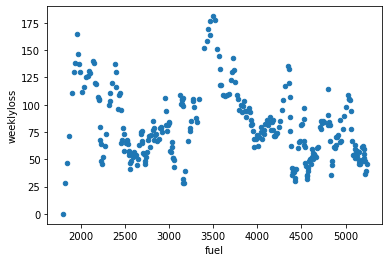

In [14]:
ax1 = data.plot.scatter(x = cName, y = 'weeklyloss')

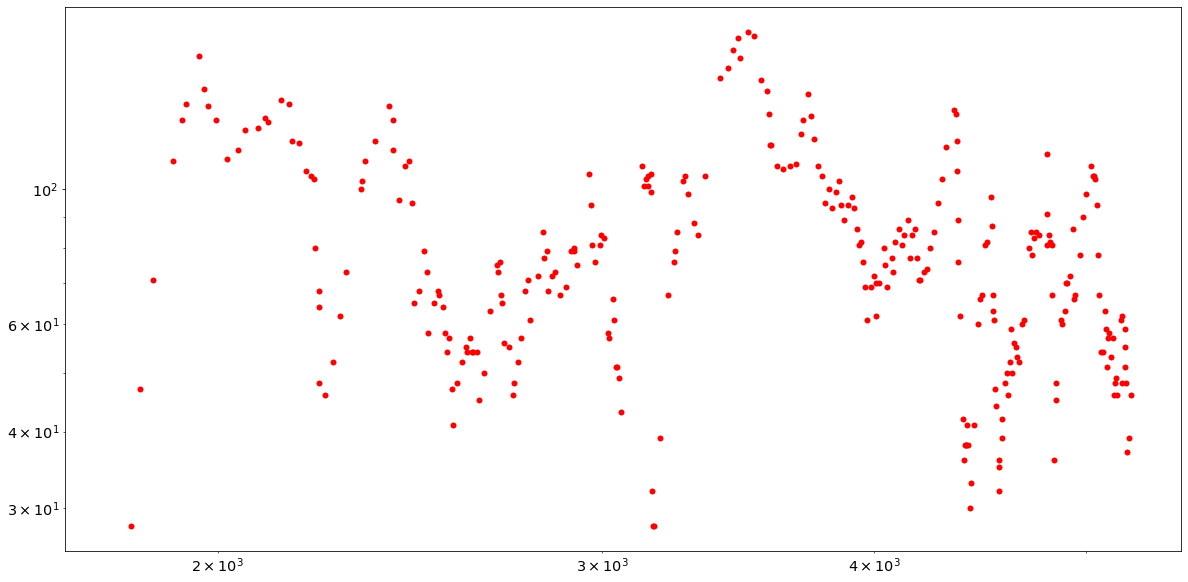

In [15]:
# plt.rcParams['figure.figsize'] = [20, 10]

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


fig = plt.figure()
ax = plt.gca()
ax.plot(data[cName] ,data['weeklyloss'], 'o', c='red', alpha=1.0, markeredgecolor='none')
ax.set_yscale('log')
ax.set_xscale('log')


posx and posy should be finite values


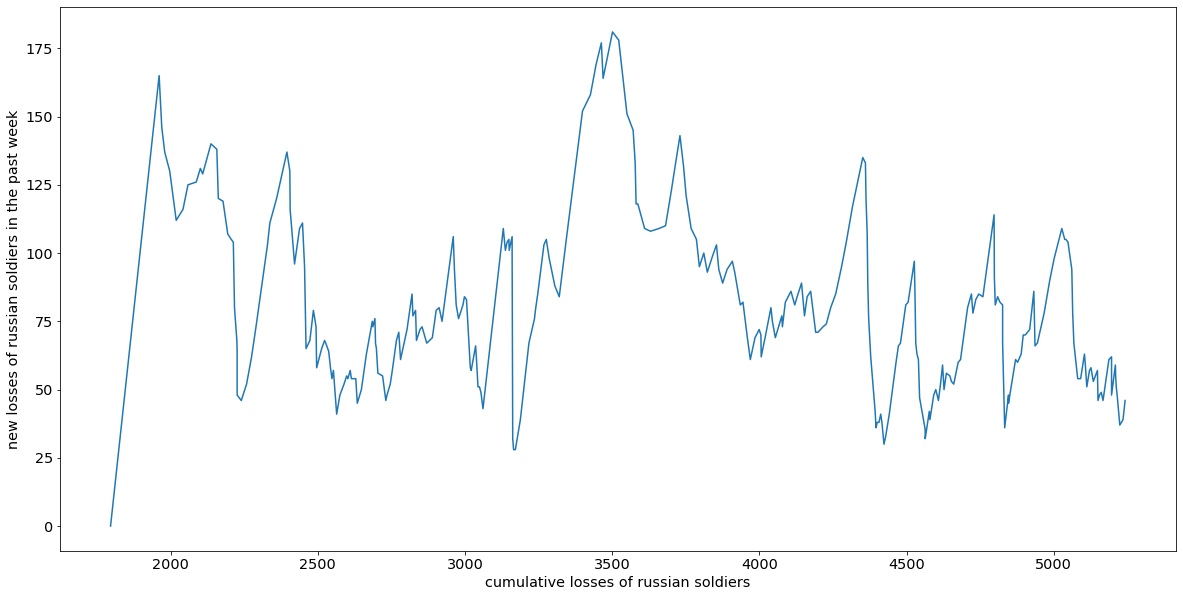

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

X = data[cName]
Y = data['weeklyloss']

ax1.plot(X,Y)
ax1.set_xlabel(r"cumulative losses of russian soldiers")
ax1.set_ylabel(r"new losses of russian soldiers in the past week")

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(data[data.index % 20 == 0][cName])
ax2.set_xticklabels(data[data.index % 20 == 0]['day'])
ax2.set_xlabel(r"Day")
plt.show()

posx and posy should be finite values


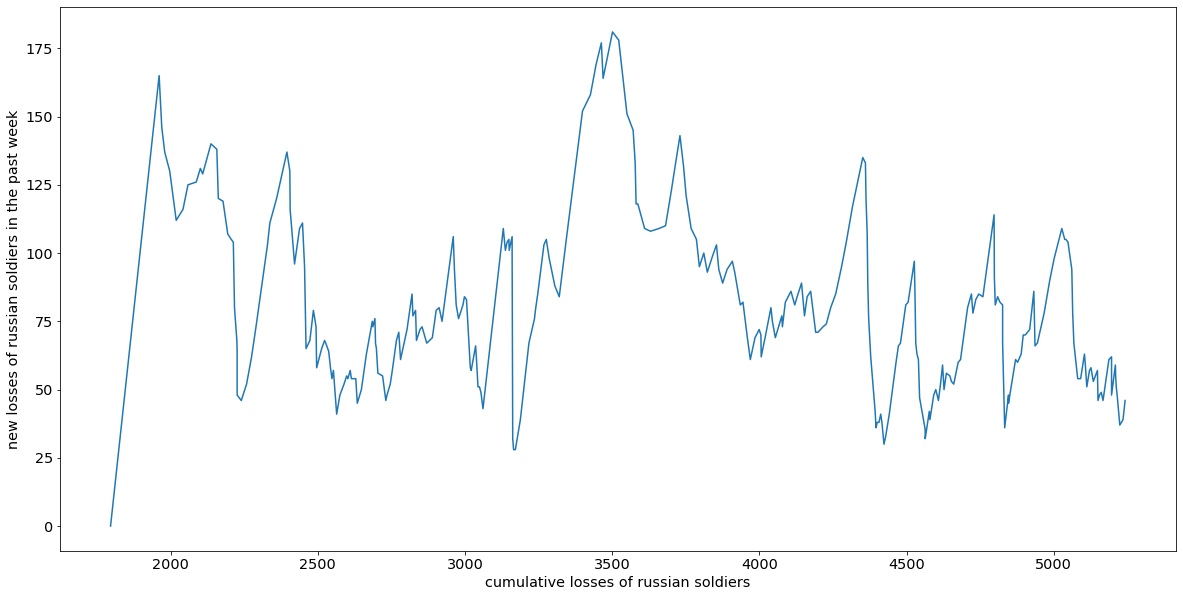

In [17]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

X = data[cName]
Y = data['weeklyloss']

ax1.plot(X, Y)
ax2.plot(X, Y) # Create a dummy plot
ax1.set_xlabel(r"cumulative losses of russian soldiers")
ax1.set_ylabel(r"new losses of russian soldiers in the past week")

ax2.set_xlabel(r"Day")


ax2.set_xticks(data[data.index % 20 == 0][cName])
ax2.set_xticklabels(data[data.index % 20 == 0]['day'])
# ax2.cla()
plt.show()

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

X = data[cName]
Y = data['weeklyloss']

ax1.plot(X, Y)
ax2.plot(X, Y) # Create a dummy plot
ax1.set_xlabel(r"cumulative losses of russian soldiers (log scale)")
ax1.set_ylabel(r"new losses of russian soldiers in the past week (log scale)")

ax2.set_xlabel(r"Day")
ax2.set_xscale('log')
ax2.set_yscale('log')
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2.set_xticks(data[data.index % 20 == 0][cName])
ax2.set_xticklabels(data[data.index % 20 == 0]['day'])
# ax2.cla()
plt.show()

ValueError: cannot convert float NaN to integer

<Figure size 1440x720 with 2 Axes>